# Task 1/4 Principal Component Analysis Part 3

In this part, we will process the trajectory data of 15 pedestrians over 1000 time steps.

In [1]:
import numpy as np
from pca import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pos = np.loadtxt("data_DMAP_PCA_vadere.txt")

In [3]:
pos.shape

(1000, 30)

We define a function to visualize the trajectory of specified pedestrians.

In [4]:
def visualization(pos: np.ndarray, id: np.ndarray, figsize=(10, 10), title='Trajectories of pedestrians'):
    """
    Visualization of the trajectory of the given pedestrians.

    Args:
        pos: the position information of pedestrians;
        id: the ids of the pedestrians whose trajectory is expected;
            Note: the fisrt pedestrian's id: 0, the last pedestrian's id: 14.
        figsize: tuple, the size of the plot.
    """
    fig, ax = plt.subplots(figsize=figsize)
    for i in id:
        ax.plot(pos[:, 2 * i], pos[:, 2 * i + 1], label=f'Pedestrian {i}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)
    plt.legend()
    plt.show()

Now we visualize the path of the first two pedestrians in the two-dimensional space.

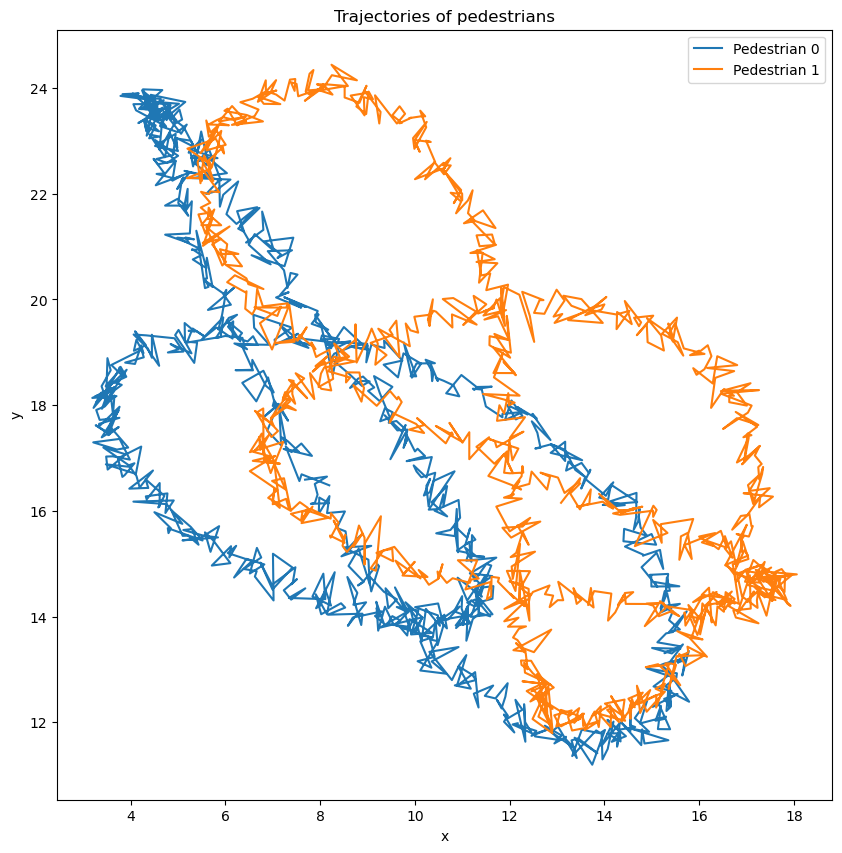

In [5]:
visualization(pos, np.array([0, 1]))

We take a look at the trajectory of all pedestrians.

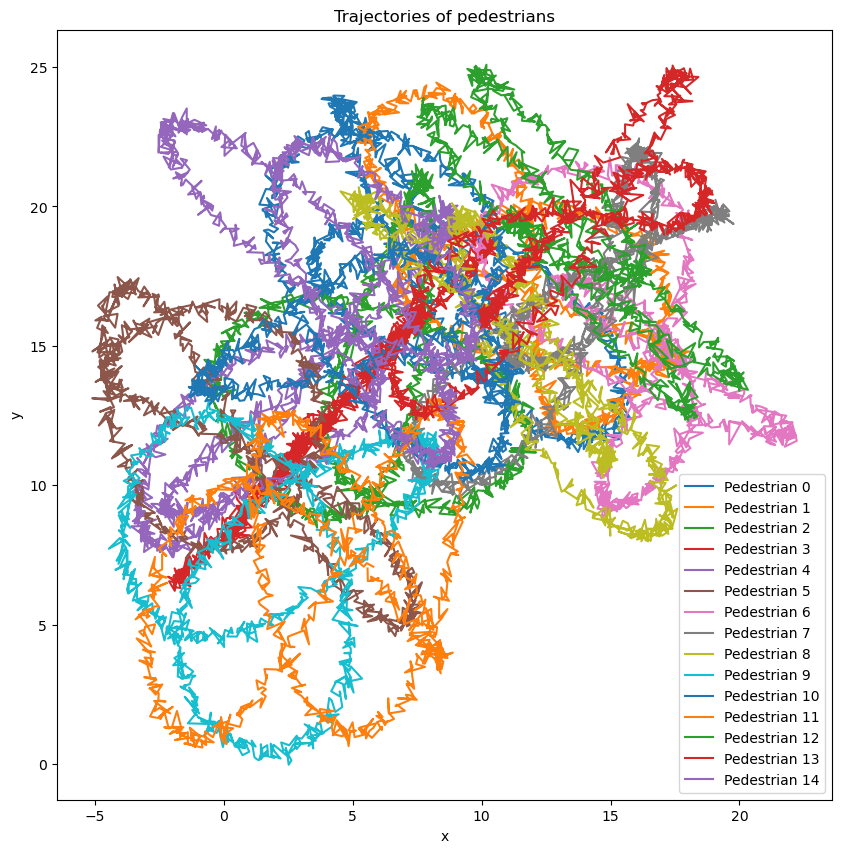

In [6]:
visualization(pos, np.arange(15))

Then we define a `PCA` instance, passing the position data.

In [7]:
ped = PCA(pos)

We compute the sigular values.

In [8]:
_, s, _ = ped.svd(full_matrices=False)

We calculate the percentage of the first two singular values among all singular values.

In [9]:
(s[0] + s[1]) / s.sum()

0.6628250856150378

$0.66 < 0.9$  
As a result, the first two components are not enough to capture most of the energy (> 90%) of the dataset.  

We can also visualize the resulting trajectory to see the difference.

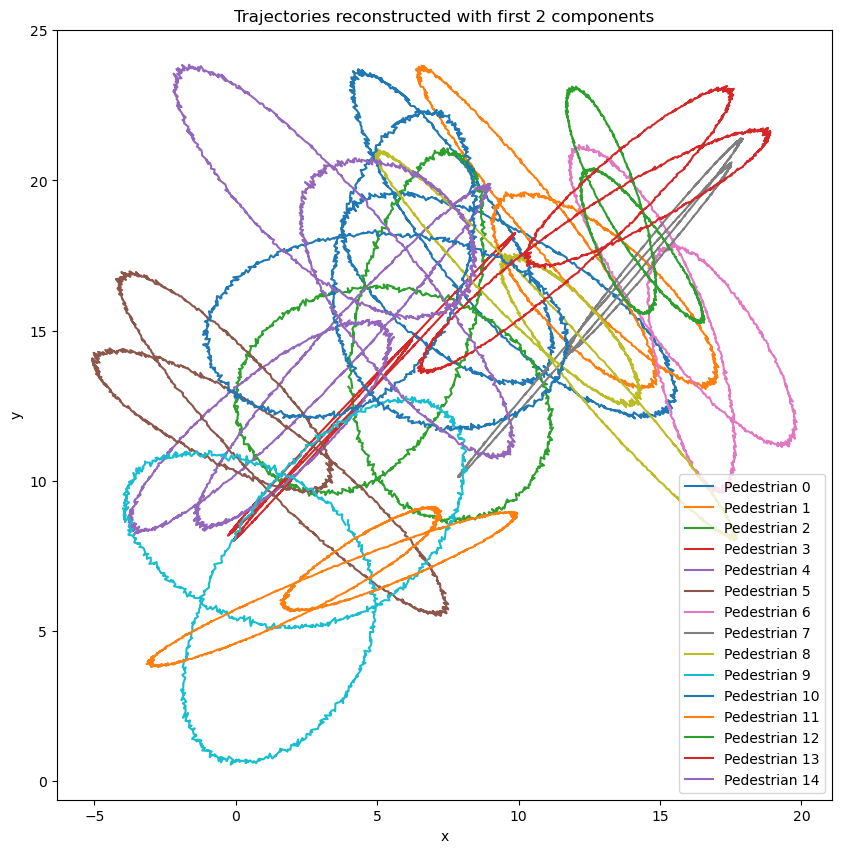

In [10]:
pos_rec_2 = ped.reconstruct(2, full_matrices=False)
visualization(pos_rec_2, np.arange(15), title='Trajectories reconstructed with first 2 components')

We compute the L1 norm of the difference to estimate the error.

In [11]:
np.sum(np.abs(pos_rec_2 - pos)) / 30000

1.0014523959511883

After that, we compute how many components do we need to capture at least 90% energy of the dataset.

In [12]:
ped.energy_loss(0.1)

11

We also visualize the resulting trajectory for comparison.

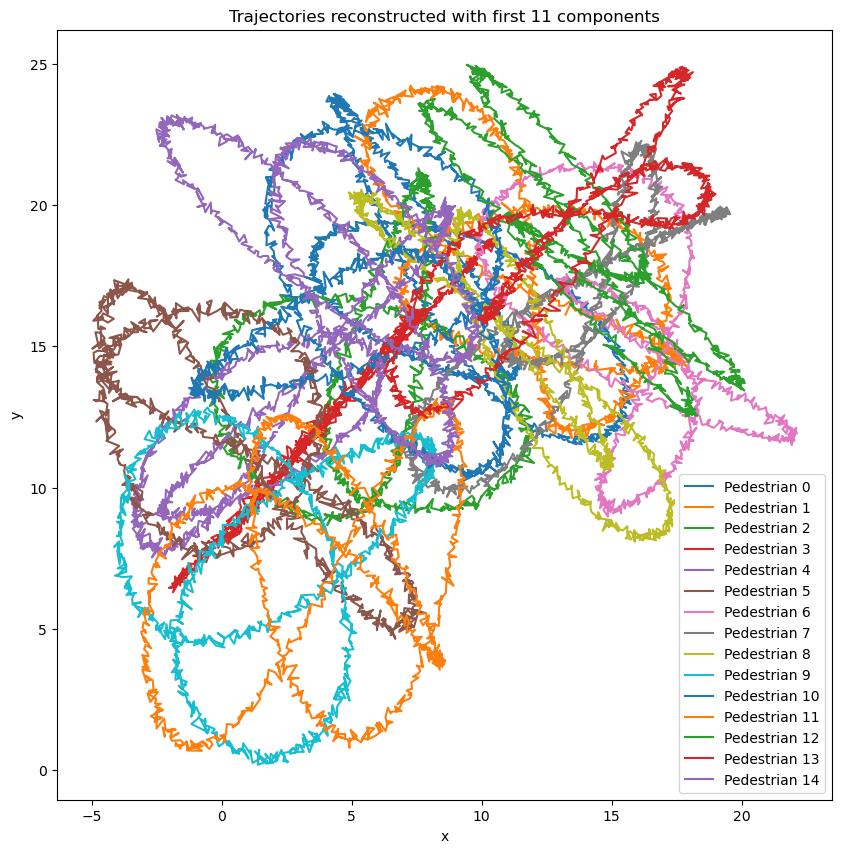

In [13]:
pos_rec_11 = ped.reconstruct(11, full_matrices=False)
visualization(pos_rec_11, np.arange(15), title='Trajectories reconstructed with first 11 components')

In [14]:
np.sum(np.abs(pos_rec_11 - pos)) / 30000

0.12054484035332645

The following is the code for generating a 2-d shape of trefoil knot.

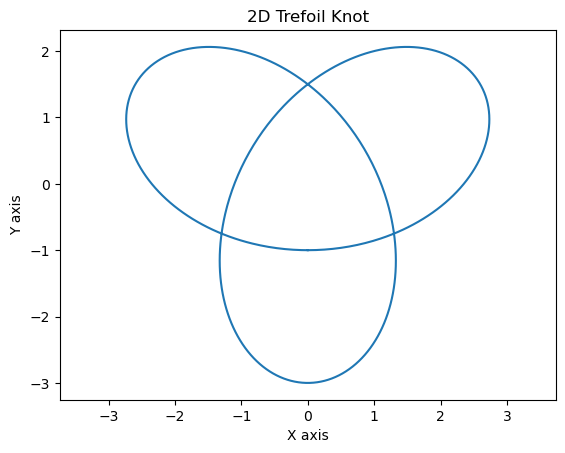

In [15]:
t = np.linspace(0, 2 * np.pi, 1000)
x = np.sin(t) + 2 * np.sin(2 * t)
y = np.cos(t) - 2 * np.cos(2 * t)

plt.figure()
plt.plot(x, y)
plt.axis('equal')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('2D Trefoil Knot')
plt.show()